In [1]:
import netlsd as net
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from sklearn.manifold import TSNE

In [34]:
import sys
import os

sys.path.extend(['./..'])  # have to add the project path manually to the Python path
os.chdir('./..')

NameError: name 'pwd' is not defined

In [35]:
from src.utils import load_pickle
from src.Tree import TreeNode

In [2]:
%matplotlib inline

In [164]:
plt.rcParams['figure.figsize'] = (10, 7)

In [96]:
def get_graph_vec(g: nx.Graph, kernel: str='heat', dim: int=250, eigenvalues: int=20) -> np.ndarray:
    return net.netlsd(g, kernel=kernel, timescales=np.logspace(-2, 2, dim), eigenvalues=eigenvalues)

In [97]:
def compare_graphs(g1: nx.Graph, g2: nx.Graph, kernel: str='heat', dim: int=250, eigenvalues: int=20) -> float:
    g_vec1 = get_graph_vec(g=g1, kernel=kernel, dim=dim, eigenvalues=eigenvalues)
    g_vec2 = get_graph_vec(g=g2, kernel=kernel, dim=dim, eigenvalues=eigenvalues)
    return net.compare(g_vec1, g_vec2)

## lets try out some plotting

In [5]:
dim = 250

In [6]:
g_orig = nx.karate_club_graph()

In [7]:
random_graphs = [nx.configuration_model(deg_sequence=[d for n, d in g_orig.degree()], create_using=nx.Graph) 
                 for _ in range(10)]

In [8]:
rows = {'name': ['orig'] + [f'rand_{i+1}' for i in range(len(random_graphs))],
       'graph': [g_orig] + random_graphs}
df = pd.DataFrame(rows)

In [9]:
vecs = np.zeros((1+len(random_graphs), dim))
vecs[0, :] = get_graph_vec(g_orig, dim=dim)
for i, random_graph in enumerate(random_graphs):
    vecs[i+1, :] = get_graph_vec(random_graph, dim=dim)

In [10]:
df = pd.concat([df, pd.DataFrame(vecs)], axis=1)

In [11]:
pca = decomposition.PCA(n_components=2)
graph_pca = pca.fit_transform(df.iloc[:, 2:])

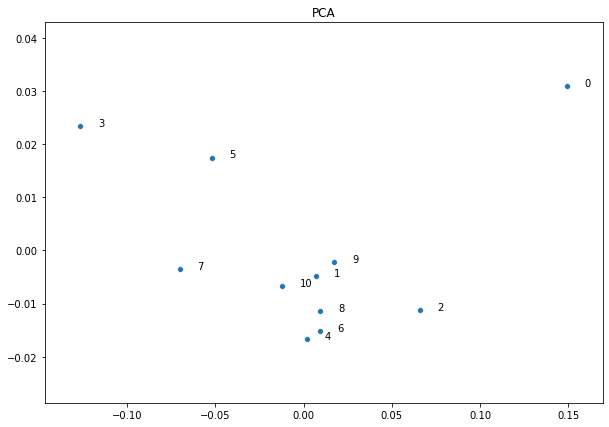

In [31]:
plt.title('PCA')
sns.scatterplot(x=graph_pca[:, 0], y=graph_pca[:, 1]);

ax = plt.gca()
for i in range(graph_pca.shape[0]):
    x, y = graph_pca[i,: ]
    ax.text(x+.01, y, str(i))

In [13]:
tsne = TSNE(n_components=2)
graph_tsne = tsne.fit_transform(df.iloc[:, 2:])

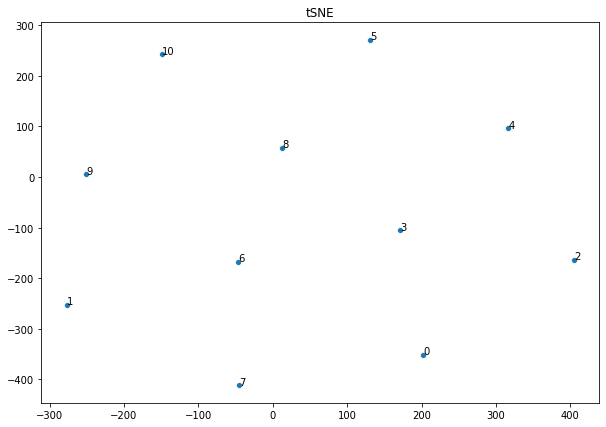

In [32]:
plt.title('tSNE')
sns.scatterplot(x=graph_tsne[:, 0], y=graph_tsne[:, 1]);

ax = plt.gca()
for i in range(graph_tsne.shape[0]):
    x, y = graph_tsne[i,: ]
    ax.text(x+0.015, y+0.75, str(i))

## let's do the infinity mirror stuff

In [180]:
tsne_2 = TSNE(n_components=2)
pca_2 = decomposition.PCA(n_components=2)

In [181]:
tsne_1 = TSNE(n_components=1)
pca_1 = decomposition.PCA(n_components=1)

In [141]:
def get_row(root, cols, name, model):
    for tnode in [root] + list(root.descendants):
        row = {'name': name, 'level': tnode.depth, 'model': model}

        for i, x in enumerate(get_graph_vec(tnode.graph, dim=dim)):
            row[f'v{i}'] = x

        for col in cols[-4: ]:
            row[col] = None
        yield row

In [175]:
data_path = '/data/dgonza26'
name = 'clique-ring-500-4'
model = 'CNRG'
dim = 250
cols = ['name', 'model', 'level']
cols.extend([f'v{i}' for i in range(dim)])
cols.extend(['pca_x', 'pca_y', 'tsne_x', 'tsne_y'])

rows = {col: [] for col in cols}
T = 20
for trial in range(1, T+1):
    pickle_path = f'{data_path}/{name}/{model}/fast_20_{trial}.pkl.gz'
    print('reading', pickle_path)
    root = load_pickle(pickle_path)
    for row in get_row(root, cols, name, model):
        for key, val in row.items():
            rows[key].append(val)

df = pd.DataFrame(rows)

reading /data/dgonza26/clique-ring-500-4/CNRG/fast_20_1.pkl.gz
reading /data/dgonza26/clique-ring-500-4/CNRG/fast_20_2.pkl.gz
reading /data/dgonza26/clique-ring-500-4/CNRG/fast_20_3.pkl.gz
reading /data/dgonza26/clique-ring-500-4/CNRG/fast_20_4.pkl.gz
reading /data/dgonza26/clique-ring-500-4/CNRG/fast_20_5.pkl.gz
reading /data/dgonza26/clique-ring-500-4/CNRG/fast_20_6.pkl.gz
reading /data/dgonza26/clique-ring-500-4/CNRG/fast_20_7.pkl.gz
reading /data/dgonza26/clique-ring-500-4/CNRG/fast_20_8.pkl.gz
reading /data/dgonza26/clique-ring-500-4/CNRG/fast_20_9.pkl.gz
reading /data/dgonza26/clique-ring-500-4/CNRG/fast_20_10.pkl.gz
reading /data/dgonza26/clique-ring-500-4/CNRG/fast_20_11.pkl.gz
reading /data/dgonza26/clique-ring-500-4/CNRG/fast_20_12.pkl.gz
reading /data/dgonza26/clique-ring-500-4/CNRG/fast_20_13.pkl.gz
reading /data/dgonza26/clique-ring-500-4/CNRG/fast_20_14.pkl.gz
reading /data/dgonza26/clique-ring-500-4/CNRG/fast_20_15.pkl.gz
reading /data/dgonza26/clique-ring-500-4/CNRG/fas

In [135]:
df.to_csv(f'./analysis/csv/{name}-{model}-{T}-embed.csv', index=False)

In [134]:
pwd

'/home/ssikdar/infinity-mirror'

In [145]:
df.shape

(420, 257)

In [139]:
df.head()

,name,model,level,v0,v1,v2,v3,v4,v5,v6,...,v244,v245,v246,v247,v248,v249,pca_x,pca_y,tsne_x,tsne_y
0,clique-ring-500-4,Chung-Lu,0,0.992536,0.992256,0.991966,0.991665,0.991352,0.991028,0.990692,...,0.016956,0.016664,0.016382,0.01611,0.015847,0.015593,1.895836e-14,-3.815049e-15,-40.722855,-17.289858
1,clique-ring-500-4,Chung-Lu,1,0.992536,0.992256,0.991966,0.991665,0.991352,0.991028,0.990692,...,0.016956,0.016664,0.016382,0.01611,0.015847,0.015593,1.391170e-14,1.135090e-14,-45.495399,5.305357
2,clique-ring-500-4,Chung-Lu,2,0.992536,0.992256,0.991966,0.991665,0.991352,0.991028,0.990692,...,0.016956,0.016664,0.016382,0.01611,0.015847,0.015593,-1.356415e-14,1.865733e-14,13.540232,34.715652
3,clique-ring-500-4,Chung-Lu,3,0.992536,0.992256,0.991966,0.991665,0.991352,0.991028,0.990692,...,0.016956,0.016664,0.016382,0.01611,0.015847,0.015593,-8.404970e-15,-4.309569e-15,30.908463,-6.090539
4,clique-ring-500-4,Chung-Lu,4,0.992536,0.992256,0.991966,0.991665,0.991352,0.991028,0.990692,...,0.016956,0.016664,0.016382,0.01611,0.015847,0.015593,1.971243e-14,5.199802e-15,-47.209839,-5.004240


In [190]:
np.round(df.iloc[:, 3: -6].to_numpy().std(axis=0), 3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## few choices for PCA/t-SNE
* Do we compute the stats for all the data at once? Maybe.
* Should we segment by each generation? Probably not.

### global PCA/t-SNE

In [191]:
df.head()

,name,model,level,v0,v1,v2,v3,v4,v5,v6,...,v246,v247,v248,v249,pca_x,pca_y,tsne_x,tsne_y,pca_1,tsne_1
0,clique-ring-500-4,CNRG,0,0.992536,0.992256,0.991966,0.991665,0.991352,0.991028,0.990692,...,0.016382,0.01611,0.015847,0.015593,-4.479666e-15,1.026293e-15,3.811537,-5.614816,-4.479666e-15,9.090350
1,clique-ring-500-4,CNRG,1,0.992536,0.992256,0.991966,0.991665,0.991352,0.991028,0.990692,...,0.016382,0.01611,0.015847,0.015593,5.032834e-15,-7.156695e-15,-15.318649,3.402625,5.032834e-15,-13.899453
2,clique-ring-500-4,CNRG,2,0.992536,0.992256,0.991966,0.991665,0.991352,0.991028,0.990692,...,0.016382,0.01611,0.015847,0.015593,2.449439e-14,-7.011671e-16,-4.021807,29.304674,2.449439e-14,-32.140526
3,clique-ring-500-4,CNRG,3,0.992536,0.992256,0.991966,0.991665,0.991352,0.991028,0.990692,...,0.016382,0.01611,0.015847,0.015593,1.326770e-16,-3.180459e-15,-6.917398,-2.556870,1.326770e-16,2.323514
4,clique-ring-500-4,CNRG,4,0.992536,0.992256,0.991966,0.991665,0.991352,0.991028,0.990692,...,0.016382,0.01611,0.015847,0.015593,2.665724e-14,5.441045e-15,0.075632,30.895197,2.665724e-14,-33.158195


In [184]:
df[['pca_x', 'pca_y']] = pca_2.fit_transform(df.iloc[:, 3: -6])
df[['tsne_x', 'tsne_y']] = tsne_2.fit_transform(df.iloc[:, 3: -6])

In [185]:
df['pca_1'] = pca_1.fit_transform(df.iloc[:, 3: -6]); df['tsne_1'] = tsne_1.fit_transform(df.iloc[:, 3: -6])

In [186]:
df.head()

,name,model,level,v0,v1,v2,v3,v4,v5,v6,...,v246,v247,v248,v249,pca_x,pca_y,tsne_x,tsne_y,pca_1,tsne_1
0,clique-ring-500-4,CNRG,0,0.992536,0.992256,0.991966,0.991665,0.991352,0.991028,0.990692,...,0.016382,0.01611,0.015847,0.015593,-4.479666e-15,1.026293e-15,3.811537,-5.614816,-4.479666e-15,9.090350
1,clique-ring-500-4,CNRG,1,0.992536,0.992256,0.991966,0.991665,0.991352,0.991028,0.990692,...,0.016382,0.01611,0.015847,0.015593,5.032834e-15,-7.156695e-15,-15.318649,3.402625,5.032834e-15,-13.899453
2,clique-ring-500-4,CNRG,2,0.992536,0.992256,0.991966,0.991665,0.991352,0.991028,0.990692,...,0.016382,0.01611,0.015847,0.015593,2.449439e-14,-7.011671e-16,-4.021807,29.304674,2.449439e-14,-32.140526
3,clique-ring-500-4,CNRG,3,0.992536,0.992256,0.991966,0.991665,0.991352,0.991028,0.990692,...,0.016382,0.01611,0.015847,0.015593,1.326770e-16,-3.180459e-15,-6.917398,-2.556870,1.326770e-16,2.323514
4,clique-ring-500-4,CNRG,4,0.992536,0.992256,0.991966,0.991665,0.991352,0.991028,0.990692,...,0.016382,0.01611,0.015847,0.015593,2.665724e-14,5.441045e-15,0.075632,30.895197,2.665724e-14,-33.158195


In [187]:
# make level into a string
df['level'] = df['level'].apply(int)
filtered_df = df[df.level<6]
filtered_df['level'] = filtered_df.level.apply(str)

In [160]:
sns.scatterplot(x='tsne_x', y='tsne_y', marker='o', hue='level', data=filtered_df);

AttributeError: 'str' object has no attribute 'view'

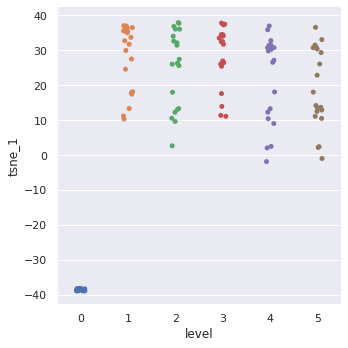

In [174]:
sns.catplot(x='level', y='tsne_1', hue='level', data=filtered_df);

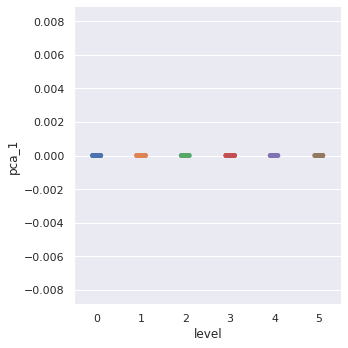

In [189]:
sns.catplot(x='level', y='pca_1', hue='level', data=filtered_df);

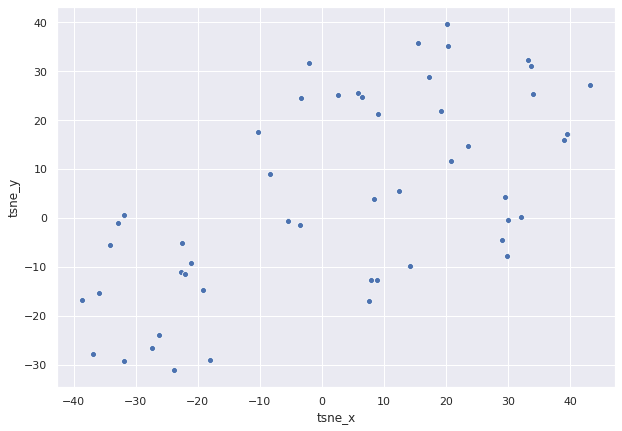

In [110]:
sns.scatterplot(x='tsne_x', y='tsne_y', data=df[df.level==0]);

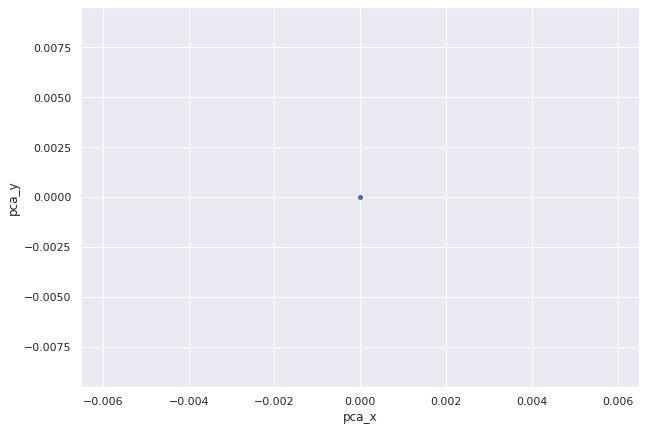

In [138]:
sns.scatterplot(x='pca_x', y='pca_y', data=df[df.level==0]);

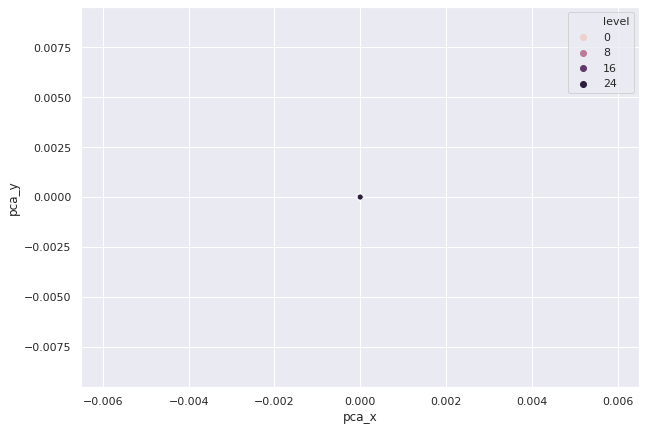

In [112]:
sns.scatterplot(x='pca_x', y='pca_y', hue='level', marker='o', data=df);

In [113]:
df[['pca_x', 'pca_y']]

,pca_x,pca_y
0,-1.657024e-14,-1.174513e-15
1,1.694701e-14,-8.923467e-15
2,-7.085872e-15,1.838746e-14
3,8.075992e-15,-4.841611e-15
4,-1.822812e-14,7.505357e-15
...,...,...
1045,1.052517e-14,-3.648770e-15
1046,-2.648195e-14,2.337924e-14
1047,1.251960e-14,-9.350824e-15
1048,1.352432e-14,4.651383e-15
